[Reference](https://pub.towardsai.net/time-series-forecasting-predicting-stock-prices-using-facebooks-prophet-model-c7b764fb592)

# Load & inspect the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset using pandas
data = pd.read_csv("https://raw.githubusercontent.com/Branden-Kang/Time-Series-Analysis/master/Data/AAPL.csv") 
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-01,56.267502,57.055000,56.049999,56.147499,55.595886,139223200
1,2019-10-02,55.764999,55.895000,54.482498,54.740002,54.202213,138449200
2,2019-10-03,54.607498,55.240002,53.782501,55.205002,54.662643,114426000
3,2019-10-04,56.410000,56.872501,55.972500,56.752499,56.194942,138478800
4,2019-10-07,56.567501,57.482498,56.459999,56.764999,56.207317,122306000


In [2]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,81.060435,82.208686,79.984664,81.193952,80.892294,1.343067e+08
std,19.082557,19.327577,18.466118,18.885079,19.038196,5.614725e+07
min,54.607498,55.240002,53.152500,54.740002,54.202213,4.199410e+07
25%,66.449997,67.062500,65.752502,66.592499,66.243423,9.565440e+07
50%,76.809998,77.942497,76.072502,77.377502,76.847343,1.248144e+08
75%,91.250000,92.617500,90.567497,91.209999,91.045845,1.622340e+08
max,137.589996,137.979996,130.529999,134.179993,134.179993,3.743368e+08


# Build the predictive model

In [3]:
# Select only the important features i.e. the date and price
data = data[["Date","Close"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
data.head(5)

,ds,y
0,2019-10-01,56.147499
1,2019-10-02,54.740002
2,2019-10-03,55.205002
3,2019-10-04,56.752499
4,2019-10-07,56.764999


In [4]:
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


# Plot the predictions

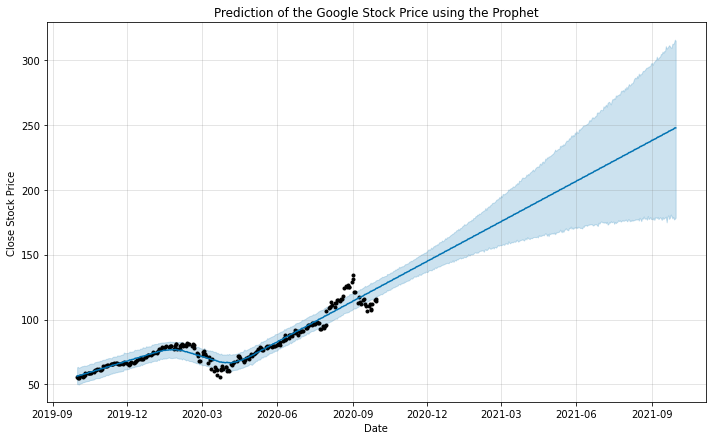

In [5]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Google Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

# Plot the trend, weekly, seasonally, yearly and daily components

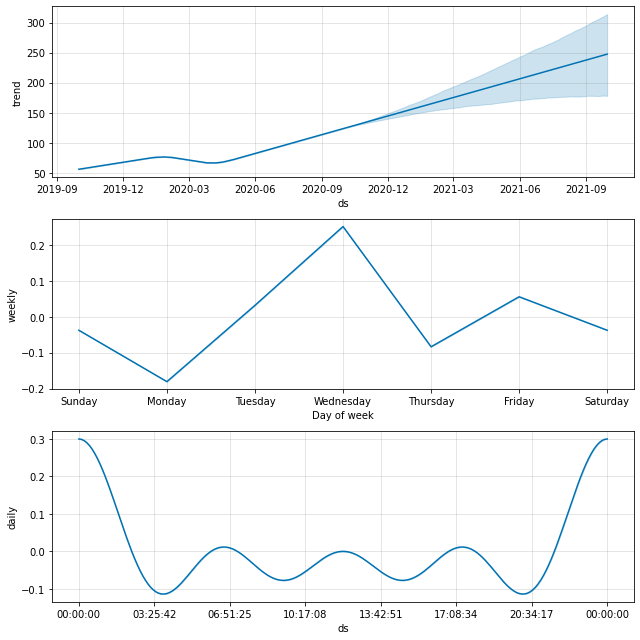

In [6]:
m.plot_components(prediction)
plt.show()